<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-louvain
!pip install networkx
!pip install cdlib

Here are the imports needed for this assignment!

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from random import sample
import numpy as np

For the following questions, we will use the Facebook ego.

In [7]:
filenameFacebook = "/content/facebook/414.edges"

In [8]:
graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

#Question (a)

The aim of this question is to find the induced subgraph made of 10 nodes of the graph. To do that we first search the 10 nodes with the highest degree in the network. Then with the function from networkx, we get the induced subgraph made from these found nodes. After that, we just plot it to see how it looks like.

In [9]:
listOfNodesWithCorrespondingDegrees = list(graphFacebook.degree(list(graphFacebook.nodes)))
sortedListOfNodesWithCorrespondingDegrees = sorted(
    listOfNodesWithCorrespondingDegrees,
    key=lambda t: t[1],
    reverse=True)

tenNodesWithHighestDegree = []

for i in range(0, 10):
  tenNodesWithHighestDegree.append(sortedListOfNodesWithCorrespondingDegrees[i])
  
tenNodes = []

for i in range(0, 10):
  tenNodes.append(tenNodesWithHighestDegree[i][0])
print("The ten chosen nodes are", tenNodes)

The ten chosen nodes are [376, 373, 513, 428, 483, 348, 591, 559, 436, 475]


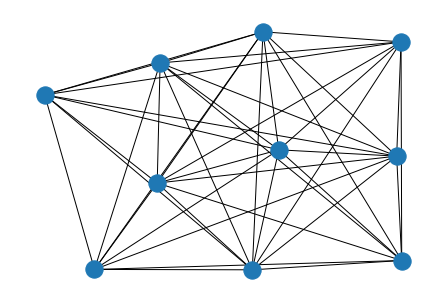

In [10]:
inducedFacebook = nx.induced_subgraph(graphFacebook, tenNodes)
nx.draw(inducedFacebook)

#Question (b)

For community detection, there are the following algorithms:
* Girvan-Newman algorithm
* Louvain algorithm
* Greedy_modularity_communities algorithm

Since the first algorithm and the second one were seen in class, we will skip the explanation about it. So the only one missing some explanation is the Greedy-modularity-communities algorithm. 

Greedy-modularity-communities algorithm was designed by Clauset, Newman and Moore and this algorithm tries to maximize the modularity of the network. It begins similarly to the Louvain algorithm as it also starts as every node being its own community. Further it joins two communities if the modularity increases when combining them. It continues this process until there is no more modularity increments.

#Question (c)

To complete this question, we constructed 4 functions:
* draw_circular_networkx
* draw_plot_networkx
* get_color_map
* get_community_edges

The first function is to help us draw the graph in a circular layout. Each community will contain a different color and the nodes in the same community will have the same color. Now for the edges, edges connecting nodes from the same communty will be black and edges connecting nodes from different communities will be silver.

The second function will do the same but in a spring layout.

get_color_map will return a list of the same length as the list of nodes in the network. At each entry, it contains a color that corresponds to a node in the same entry number in the list of nodes. The color is priorly defined by a rgb tuple with values randomly picked. The number of colors generated is the same as the number of communities in the graph. Note this method of finding the colors lead to color ambiguities (picking very similar colors for different communities eg) however it is very handy when the number of communities is unknown.

The get_community_edges function returns two lists, one list is the edges which connect two node in the same community, namely internal and the other one is a list of edges which connect two different communities, namely external.

For each different algorithm, we try to find the different communities. After that, we use the get_community_edges to find the two lists of edges. Before ploting, we just call the get_color_map to get the list of colors. Now we are ready to plot the network in a spring layout and in a circular layout.

In [11]:
def draw_circular_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.circular_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

In [12]:
def draw_plot_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.spring_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

In [13]:
def get_color_map(nodeGroups, G):
  listOfColors = []

  for i in range(len(nodeGroups)):
    listOfColors.append(list(np.random.choice(range(255),size=3)))

  for i in range(len(listOfColors)):
    for j in range(3):
      listOfColors[i][j] = listOfColors[i][j] /255

  colorMap = []

  for node in G:
    for i in range(len(nodeGroups)):
      if node in nodeGroups[i]:
        colorMap.append(listOfColors[i])
  
  return colorMap

In [14]:
def get_community_edges(nodeGroups, G):
  external = []
  internal = []

  for i in range(len(nodeGroups)):
    for node_in in nodeGroups[i]:
      for node_ex in G.nodes:
        if G.has_edge(node_in, node_ex) == True:
          if node_ex in nodeGroups[i]:
            if (node_in, node_ex) not in internal and (node_ex, node_in) not in internal:
              internal.append((node_in, node_ex))
          else:
            if (node_in, node_ex) not in external and (node_ex, node_in) not in external:
              external.append((node_in, node_ex))

  return external, internal

Girvan-Newman algorithm

In [15]:
communitiesGN = community.girvan_newman(graphFacebook)

In [35]:
nodeGroupsGN = []

for community in next(communitiesGN):
  nodeGroupsGN.append(list(community))

print("There is", len(nodeGroupsGN), "communities in the Facebook Ego.")

There is 5 communities in the Facebook Ego.


In [36]:
externalGN = get_community_edges(nodeGroupsGN, graphFacebook)[0]
internalGN = get_community_edges(nodeGroupsGN, graphFacebook)[1]

In [37]:
colorMapGN = get_color_map(nodeGroupsGN, graphFacebook)

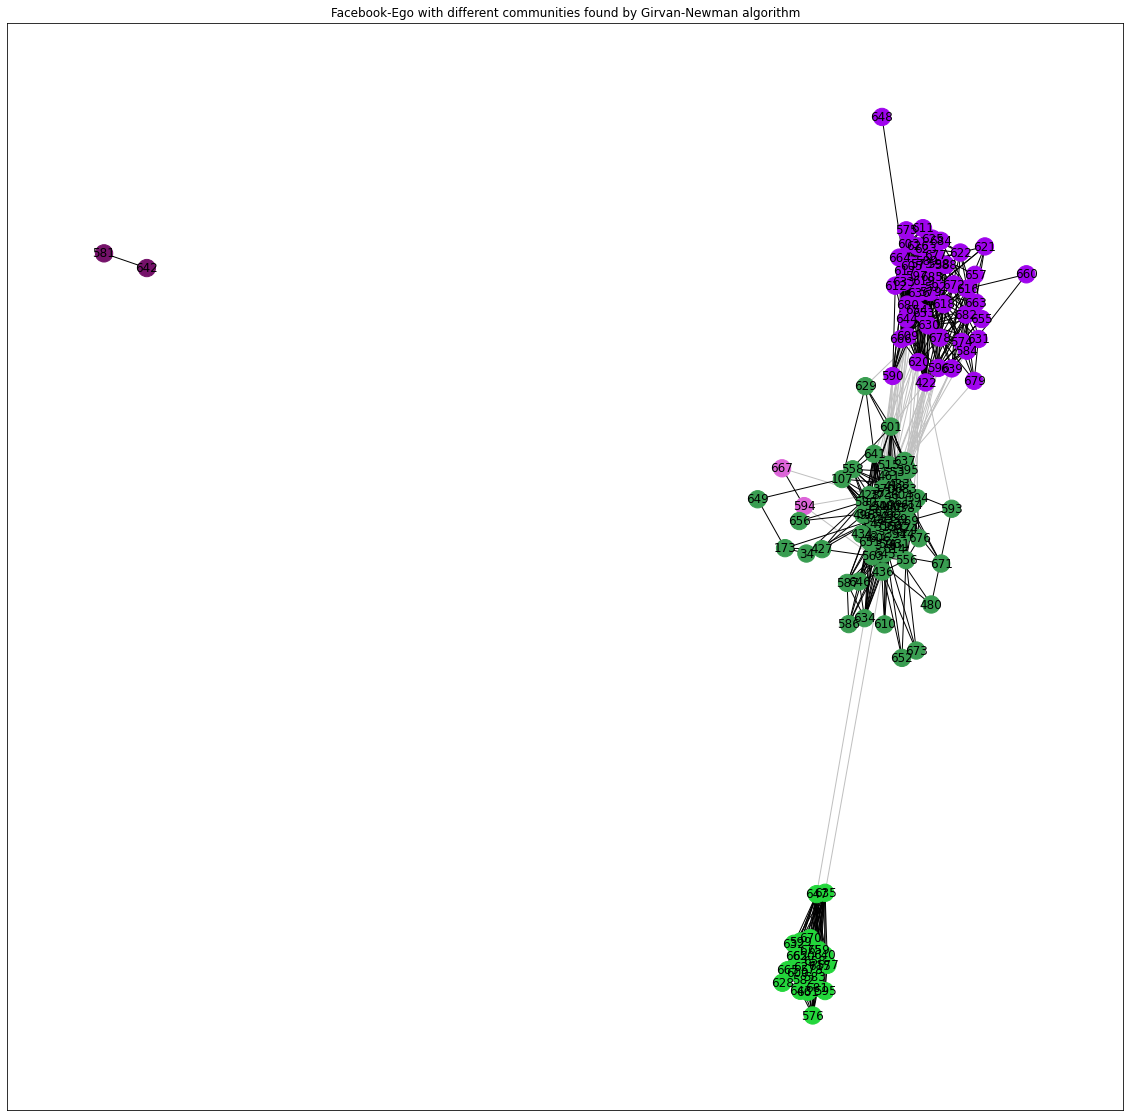

In [38]:
draw_plot_networkx(graphFacebook, colorMapGN, externalGN, internalGN, 
                   "Facebook-Ego with different communities found by Girvan-Newman algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapGN, externalGN, internalGN,  
                       "Facebook-Ego with different communities found by Girvan-Newman algorithm")

Louvain Algorithm

In [21]:
from community import community_louvain
communitiesLA = community_louvain.best_partition(graphFacebook)

In [22]:
listValuesOfTheCommunities = list(communitiesLA.values())
nodeGroupsLA = []

for i in listValuesOfTheCommunities:
  if i not in nodeGroupsLA:
    nodeGroupsLA.append(i)

In [23]:
nodeCommunitiesLA = []

for i in range(len(nodeGroupsLA)):
  nodeCommunitiesLA.append([])

for node in communitiesLA.keys():
  nodeCommunitiesLA[communitiesLA[node]].append(node)

print("There is", len(nodeCommunitiesLA), "communities in the Facebook Ego.")

There is 5 communities in the Facebook Ego.


In [24]:
externalLA = get_community_edges(nodeCommunitiesLA, graphFacebook)[0]
internalLA = get_community_edges(nodeCommunitiesLA, graphFacebook)[1]

In [25]:
colorMapLA = get_color_map(nodeCommunitiesLA, graphFacebook)

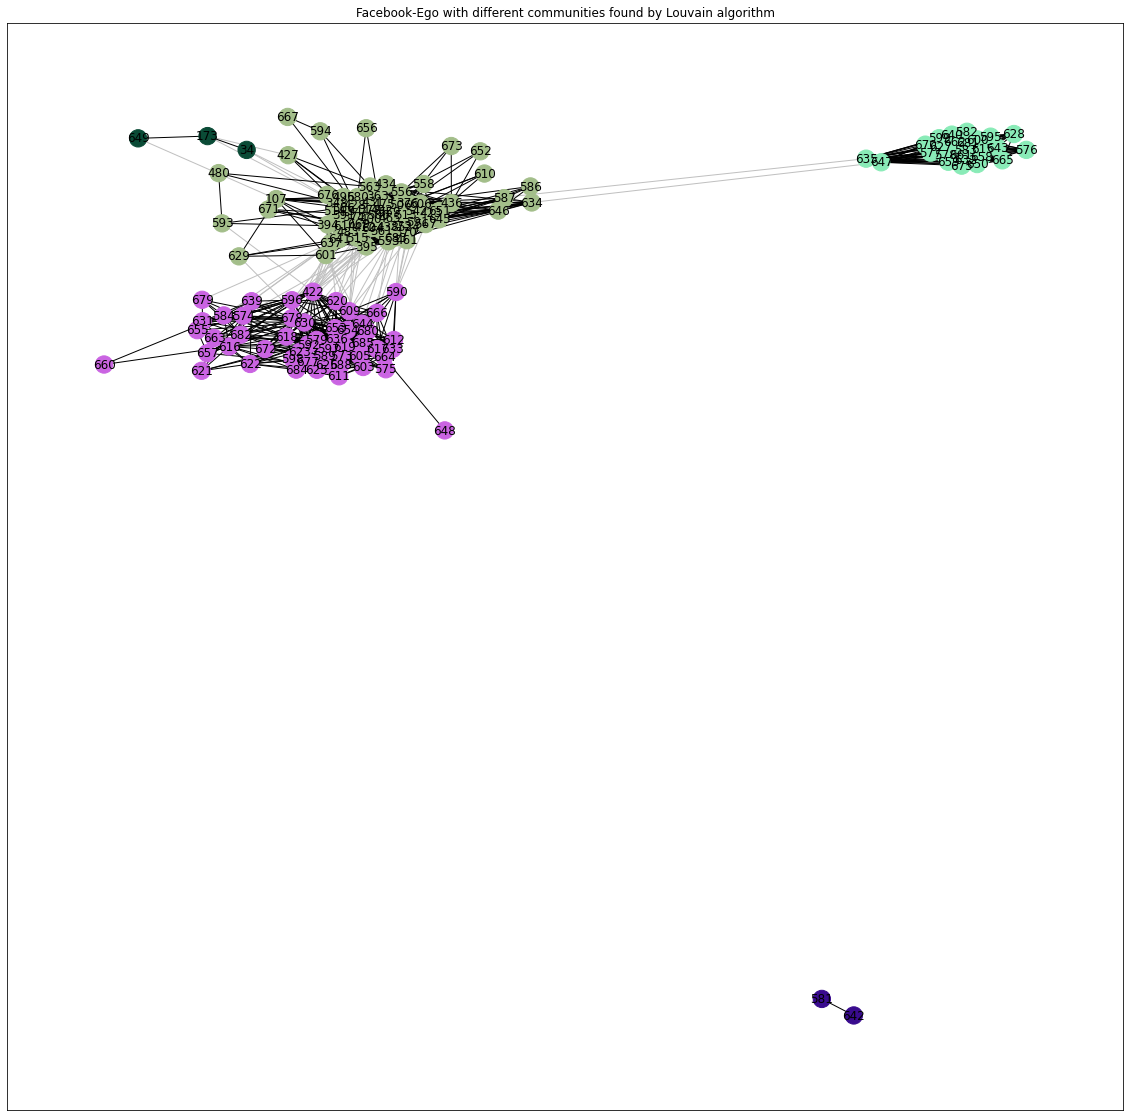

In [26]:
draw_plot_networkx(graphFacebook, colorMapLA, externalLA, internalLA,
                   "Facebook-Ego with different communities found by Louvain algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapLA, externalLA, internalLA,
                       "Facebook-Ego with different communities found by Louvain algorithm")

Greedy-modularity-communities detection algorithm

In [28]:
from networkx.algorithms import community
communitiesGMC = community.greedy_modularity_communities(graphFacebook)

In [29]:
print("There is", len(communitiesGMC), "communities in the Facebook Ego.")

There is 5 communities in the Facebook Ego.


In [30]:
externalGMC = get_community_edges(communitiesGMC, graphFacebook)[0]
internalGMC = get_community_edges(communitiesGMC, graphFacebook)[1]

In [31]:
colorMapGMC = get_color_map(communitiesGMC, graphFacebook)

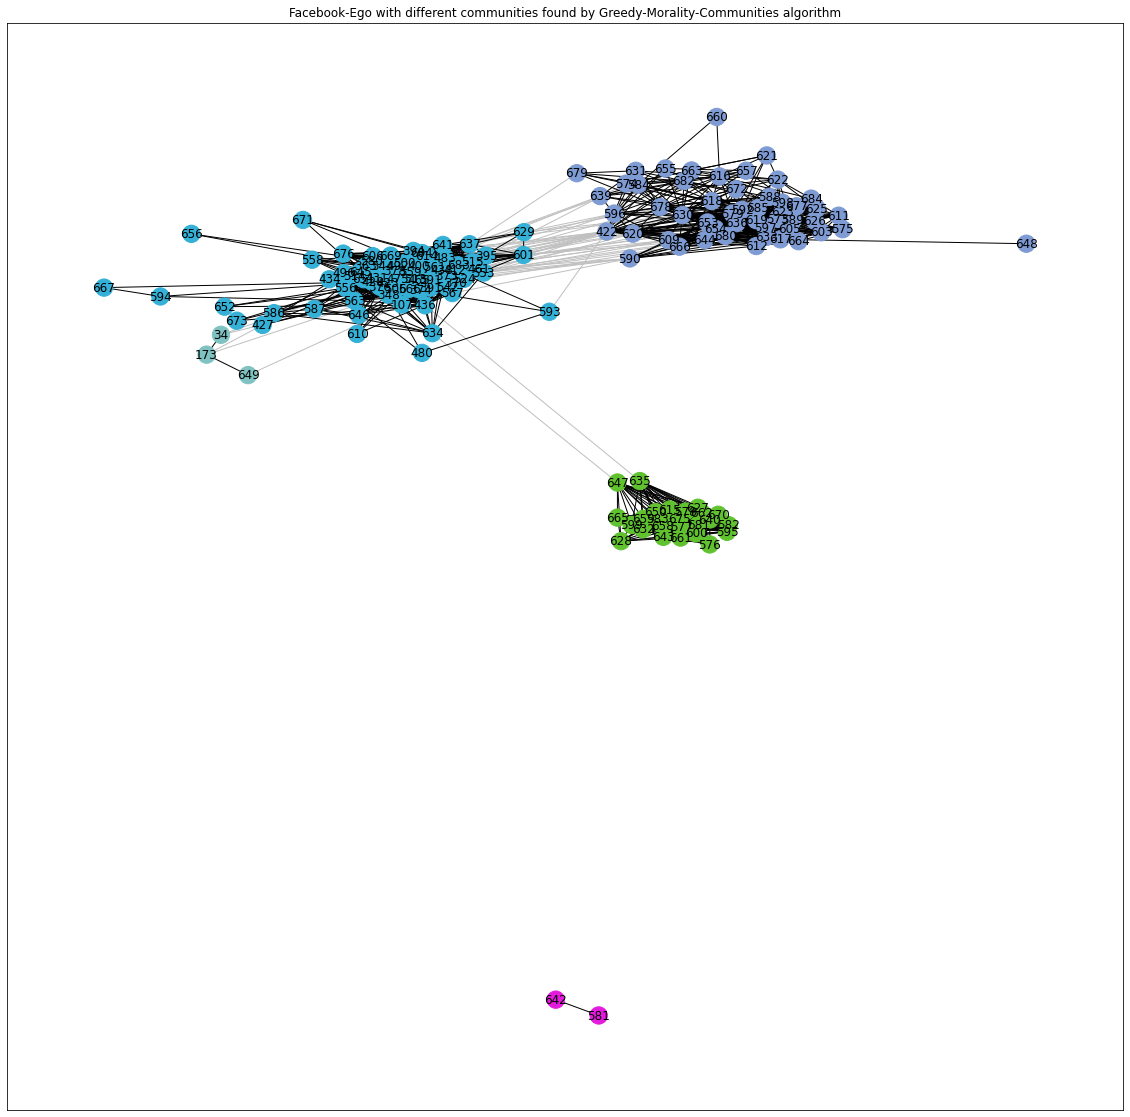

In [32]:
draw_plot_networkx(graphFacebook, colorMapGMC, externalGMC, internalGMC,
                   "Facebook-Ego with different communities found by Greedy-Morality-Communities algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapGMC, externalGMC, internalGMC,
                       "Facebook-Ego with different communities found by Greedy-Morality-Communities algorithm")

#Question (d)

First, note that the greedy-modularity-community algorithm and the louvain algorithm found the exactly the same communities. It is interesting to see that both use modularity criteria to found the communities and even the algorithm is different but it leads to the same result. Meaning they give us the same 5 communities. One reason why that get same communities is because they calculate the same measurement (modularity). The only difference is that the greedy-modularity-community algorithm combines communities while Louvain algorithm joins a node in the communities. Now one might ask: Using the same criteria to form communities, do we get the same communities ? If yes, which criteria are those ?

However the Girvan-Newman algorithm only found 3 communities at first, meaning it splits the list of nodes into 3 communities at the first level in the dendogram. At the second level, the algorithm finds five communities as the rest of the algorithms. Those communities seem very similar with just a possible few different nodes or less nodes. This algorithm uses the betweenness closeness criteria to form communities.

